In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Gambler's Ruin Problem: Duration Analysis

## Introduction

The gambler's ruin problem is a classic problem in probability theory that analyzes the probability of winning or losing all money in a game of chance. This notebook focuses on the **duration of the game** - how many plays we expect the game to last before termination.

## Problem Setup

Consider a gambler with initial capital $k$ and an opponent with initial capital $a - k$, where $a$ is the total stake. At each play:
- The gambler wins with probability $p$
- The gambler loses with probability $q = 1 - p$

The game continues until one player loses all their money.

## 2.1 Probability Function for Duration

Let $p(n|k)$ be the conditional probability that the game ends in exactly $n$ steps given initial capital $k$.

The game must end in at least $\min(k, a-k)$ steps (if one player wins every play).

Since termination is certain, we have:
$$\sum_{n=0}^{\infty} p(n|k) = 1$$

## 2.2 Expected Duration

The expected number of plays until termination is given by:
$$d_k = E[N|K] = \sum_{n=0}^{\infty} n \cdot p(n|k)$$

where $N$ is the random variable representing the number of plays until termination.

## 2.3 Recurrence Relation

Using the law of total probability, after the first play:
$$p(n|k) = p \cdot p(n-1|k+1) + q \cdot p(n-1|k-1)$$

for $n, k \geq 1$.

Substituting into the expected duration formula and simplifying:
$$d_k = p \cdot d_{k+1} + q \cdot d_{k-1} + 1$$

This can be rearranged as:
$$p \cdot d_{k+1} - d_k + q \cdot d_{k-1} = -1 \quad \text{(Equation 2.10)}$$

## 2.4 Boundary Conditions

At the extremes:
- $d_0 = 0$ (game already over if gambler has no money)
- $d_a = 0$ (game already over if opponent has no money)

## 2.5 Solution for $s = \frac{q}{p} \neq 1$ (Unfair Game)

The difference equation is a linear inhomogeneous second-order equation.

**General Solution:**
$$d_k = A_1 + A_2 s^k + \frac{k}{q-p}$$

where $s = \frac{q}{p}$.

**Applying Boundary Conditions:**
- $A_1 + A_2 = 0$
- $A_1 + A_2 s^a + \frac{a}{q-p} = 0$

Solving these equations:
$$A_1 = -A_2 = -\frac{a}{(q-p)(1-s^a)}$$

**Final Solution for $s \neq 1$:**
$$d_k = \frac{k}{1-2p} - \frac{a(1-s^k)}{(1-2p)(1-s^a)} \quad \text{(Equation 2.11)}$$

## 2.6 Solution for $s = 1$ (Fair Game, $p = \frac{1}{2}$)

When $p = q = \frac{1}{2}$, the difference equation becomes:
$$d_{k+1} - 2d_k + d_{k-1} = -2$$

For the particular solution, we try $d_k = Ck^2$:
$$C(k+1)^2 - 2Ck^2 + C(k-1)^2 + 2 = 2C + 2 = 0$$

Therefore $C = -1$, and the general solution is:
$$d_k = A_1 + A_2 k - k^2$$

**Applying Boundary Conditions:**
- $d_0 = A_1 = 0$
- $d_a = A_2 a - a^2 = 0$, so $A_2 = a$

**Final Solution for Fair Game:**
$$d_k = k(a-k) \quad \text{(Equation 2.12)}$$

## 2.7 Key Results

### For Fair Game ($p = \frac{1}{2}$):
$$d_k = k(a-k)$$

### For Unfair Game ($p \neq \frac{1}{2}$):
$$d_k = \frac{k}{1-2p} - \frac{a(1-s^k)}{(1-2p)(1-s^a)}$$

where $s = \frac{q}{p} = \frac{1-p}{p}$.

## 2.8 Example: $a = 20$, $p = \frac{1}{2}$

For a fair game with total stake $a = 20$:
$$d_k = k(20-k)$$

The maximum expected duration occurs at $k = 10$:
$$d_{10} = 10 \times 10 = 100 \text{ plays}$$

## 2.9 General Pattern for Fair Games

If $a = 2k$ (equal initial stakes) and $p = \frac{1}{2}$:
$$d_k = k \times k = k^2$$

The expected duration grows quadratically with the initial stake size.

## 2.10 Probability Contest Region

From Figure 2.3 (referenced in the text), when $a = 20$, there is a "contest" between players when $p$ lies between 0.4 and 0.6, indicating that the game outcome becomes more uncertain in this range.

## Mathematical Notes

1. **Homogeneous vs. Inhomogeneous Equations**: The key difference from the win probability equation is the $-1$ term on the right-hand side, making this an inhomogeneous difference equation.

2. **Complementary Function**: The solution to the homogeneous equation $pd_{k+1} - d_k + qd_{k-1} = 0$.

3. **Particular Solution**: A specific solution to the complete inhomogeneous equation.

4. **Boundary Value Problem**: The boundary conditions $d_0 = d_a = 0$ determine the constants in the general solution.

## Conclusion

The expected duration of the gambler's ruin game depends critically on whether the game is fair or unfair:
- **Fair games** have duration $d_k = k(a-k)$, maximized when stakes are equal
- **Unfair games** have a more complex formula involving geometric terms
- The quadratic growth in fair games shows why gambling can be a lengthy process when players start with similar stakes

=== Gambler's Ruin Problem Analysis ===

1. Fair Game Analysis (p = 0.5, a = 20)
   k = 5: Win Prob = 0.250, Expected Duration = 75.0
   k = 10: Win Prob = 0.500, Expected Duration = 100.0
   k = 15: Win Prob = 0.750, Expected Duration = 75.0

2. Unfair Game Analysis (p = 0.4, a = 20)
   k = 5: Win Prob = 0.002, Expected Duration = 24.8
   k = 10: Win Prob = 0.017, Expected Duration = 48.3
   k = 15: Win Prob = 0.131, Expected Duration = 61.9

3. Simulation Validation (k = 10)
   Theoretical Win Prob: 0.500
   Simulated Win Rate: 0.500
   Theoretical Duration: 100.0
   Simulated Avg Duration: 100.9

4. Maximum Duration Analysis
   Fair game (a=20): Maximum duration = 100 at k = 10

5. Generating Plots...


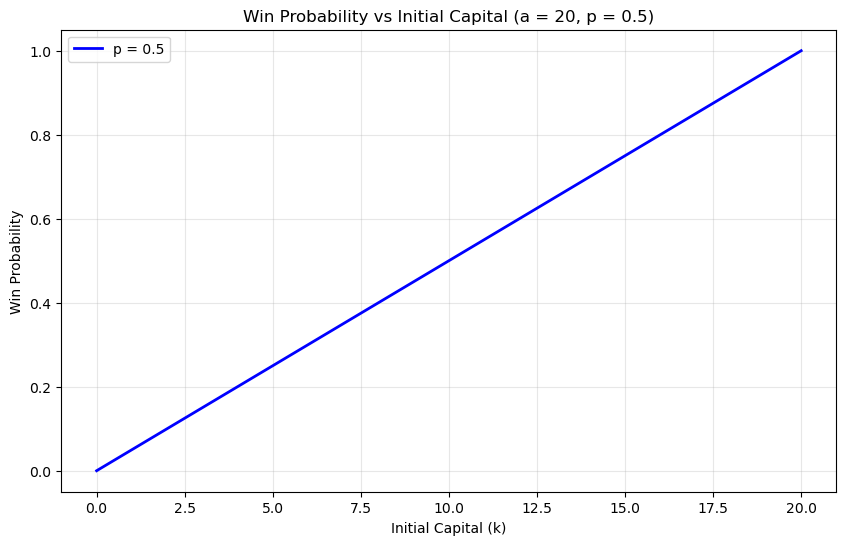

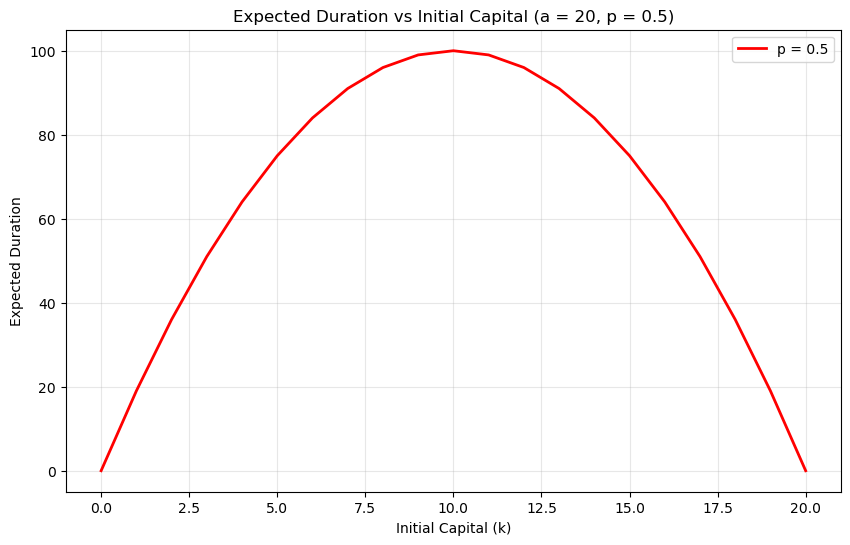

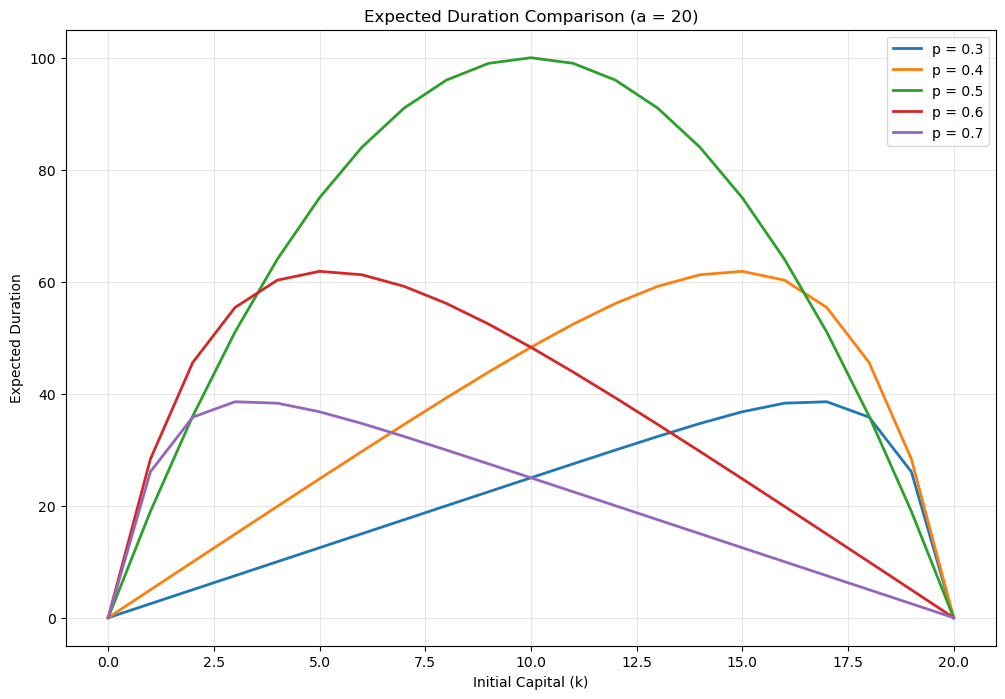

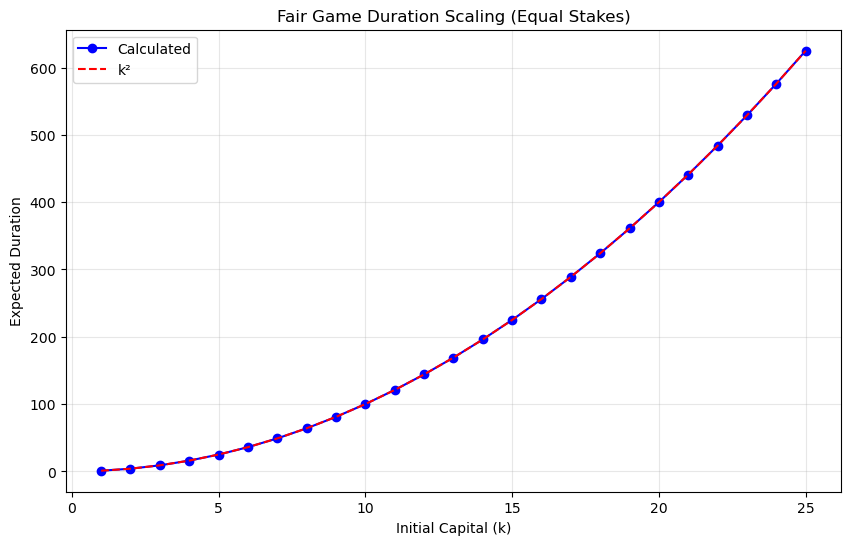

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import random
from typing import Tuple, List, Dict
import math

class GamblersRuin:
    """
    A comprehensive implementation of the Gambler's Ruin problem.
    Includes probability calculations, expected duration analysis, and simulations.
    """
    
    def __init__(self, total_stake: int, win_probability: float):
        """
        Initialize the Gambler's Ruin problem.
        
        Args:
            total_stake (int): Total money in the game (a)
            win_probability (float): Probability of winning each round (p)
        """
        self.a = total_stake
        self.p = win_probability
        self.q = 1 - win_probability
        self.s = self.q / self.p if self.p != 0 else float('inf')
        
    def win_probability(self, initial_capital: int) -> float:
        """
        Calculate the probability of winning the game given initial capital.
        
        Args:
            initial_capital (int): Starting capital (k)
            
        Returns:
            float: Probability of winning
        """
        k = initial_capital
        
        if k == 0:
            return 0.0
        if k == self.a:
            return 1.0
            
        if abs(self.p - 0.5) < 1e-10:  # Fair game
            return k / self.a
        else:  # Unfair game
            if abs(self.s - 1) < 1e-10:
                return k / self.a
            else:
                return (1 - self.s**k) / (1 - self.s**self.a)
    
    def expected_duration(self, initial_capital: int) -> float:
        """
        Calculate the expected duration of the game.
        
        Args:
            initial_capital (int): Starting capital (k)
            
        Returns:
            float: Expected number of plays until termination
        """
        k = initial_capital
        
        if k == 0 or k == self.a:
            return 0.0
            
        if abs(self.p - 0.5) < 1e-10:  # Fair game (p = 0.5)
            return k * (self.a - k)
        else:  # Unfair game
            if abs(self.s - 1) < 1e-10:
                return k * (self.a - k)
            else:
                term1 = k / (1 - 2*self.p)
                term2 = (self.a * (1 - self.s**k)) / ((1 - 2*self.p) * (1 - self.s**self.a))
                return term1 - term2
    
    def simulate_single_game(self, initial_capital: int) -> Tuple[bool, int]:
        """
        Simulate a single game of gambler's ruin.
        
        Args:
            initial_capital (int): Starting capital
            
        Returns:
            Tuple[bool, int]: (won_game, number_of_plays)
        """
        capital = initial_capital
        plays = 0
        
        while 0 < capital < self.a:
            if random.random() < self.p:
                capital += 1
            else:
                capital -= 1
            plays += 1
            
        return capital == self.a, plays
    
    def simulate_games(self, initial_capital: int, num_simulations: int = 10000) -> Dict:
        """
        Run multiple simulations of the gambler's ruin game.
        
        Args:
            initial_capital (int): Starting capital
            num_simulations (int): Number of simulations to run
            
        Returns:
            Dict: Simulation results including win rate and average duration
        """
        wins = 0
        total_duration = 0
        durations = []
        
        for _ in range(num_simulations):
            won, duration = self.simulate_single_game(initial_capital)
            if won:
                wins += 1
            total_duration += duration
            durations.append(duration)
        
        return {
            'win_rate': wins / num_simulations,
            'theoretical_win_prob': self.win_probability(initial_capital),
            'avg_duration': total_duration / num_simulations,
            'theoretical_duration': self.expected_duration(initial_capital),
            'durations': durations
        }
    
    def plot_win_probabilities(self, save_fig: bool = False):
        """Plot win probabilities for all possible initial capitals."""
        capitals = range(self.a + 1)
        probabilities = [self.win_probability(k) for k in capitals]
        
        plt.figure(figsize=(10, 6))
        plt.plot(capitals, probabilities, 'b-', linewidth=2, label=f'p = {self.p}')
        plt.xlabel('Initial Capital (k)')
        plt.ylabel('Win Probability')
        plt.title(f'Win Probability vs Initial Capital (a = {self.a}, p = {self.p})')
        plt.grid(True, alpha=0.3)
        plt.legend()
        
        if save_fig:
            plt.savefig('win_probabilities.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def plot_expected_durations(self, save_fig: bool = False):
        """Plot expected durations for all possible initial capitals."""
        capitals = range(self.a + 1)
        durations = [self.expected_duration(k) for k in capitals]
        
        plt.figure(figsize=(10, 6))
        plt.plot(capitals, durations, 'r-', linewidth=2, label=f'p = {self.p}')
        plt.xlabel('Initial Capital (k)')
        plt.ylabel('Expected Duration')
        plt.title(f'Expected Duration vs Initial Capital (a = {self.a}, p = {self.p})')
        plt.grid(True, alpha=0.3)
        plt.legend()
        
        if save_fig:
            plt.savefig('expected_durations.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    def plot_probability_vs_p(self, initial_capital: int, p_range: Tuple[float, float] = (0.1, 0.9)):
        """
        Plot win probability as a function of p for fixed initial capital.
        
        Args:
            initial_capital (int): Fixed initial capital
            p_range (Tuple[float, float]): Range of p values to plot
        """
        p_values = np.linspace(p_range[0], p_range[1], 100)
        probabilities = []
        
        for p_val in p_values:
            temp_game = GamblersRuin(self.a, p_val)
            probabilities.append(temp_game.win_probability(initial_capital))
        
        plt.figure(figsize=(10, 6))
        plt.plot(p_values, probabilities, 'g-', linewidth=2)
        plt.xlabel('Win Probability per Round (p)')
        plt.ylabel('Overall Win Probability')
        plt.title(f'Win Probability vs p (a = {self.a}, k = {initial_capital})')
        plt.grid(True, alpha=0.3)
        plt.axhline(y=0.5, color='r', linestyle='--', alpha=0.7, label='50% chance')
        plt.legend()
        plt.show()
    
    def compare_multiple_p_values(self, p_values: List[float]):
        """Compare expected durations for different p values."""
        capitals = range(self.a + 1)
        
        plt.figure(figsize=(12, 8))
        
        for p_val in p_values:
            temp_game = GamblersRuin(self.a, p_val)
            durations = [temp_game.expected_duration(k) for k in capitals]
            plt.plot(capitals, durations, linewidth=2, label=f'p = {p_val}')
        
        plt.xlabel('Initial Capital (k)')
        plt.ylabel('Expected Duration')
        plt.title(f'Expected Duration Comparison (a = {self.a})')
        plt.grid(True, alpha=0.3)
        plt.legend()
        plt.show()
    
    def analyze_fair_game_scaling(self, max_stake: int = 50):
        """Analyze how duration scales with stake size for fair games."""
        stakes = range(2, max_stake + 1, 2)  # Even stakes only
        max_durations = []
        
        for stake in stakes:
            fair_game = GamblersRuin(stake, 0.5)
            max_duration = fair_game.expected_duration(stake // 2)
            max_durations.append(max_duration)
        
        # Theoretical k^2 scaling
        half_stakes = [s // 2 for s in stakes]
        theoretical = [k**2 for k in half_stakes]
        
        plt.figure(figsize=(10, 6))
        plt.plot(half_stakes, max_durations, 'bo-', label='Calculated')
        plt.plot(half_stakes, theoretical, 'r--', label='k²')
        plt.xlabel('Initial Capital (k)')
        plt.ylabel('Expected Duration')
        plt.title('Fair Game Duration Scaling (Equal Stakes)')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
        
        return stakes, max_durations


def example_usage():
    """Demonstrate the usage of the GamblersRuin class."""
    
    print("=== Gambler's Ruin Problem Analysis ===\n")
    
    # Example 1: Fair game with a = 20
    print("1. Fair Game Analysis (p = 0.5, a = 20)")
    fair_game = GamblersRuin(20, 0.5)
    
    for k in [5, 10, 15]:
        win_prob = fair_game.win_probability(k)
        duration = fair_game.expected_duration(k)
        print(f"   k = {k}: Win Prob = {win_prob:.3f}, Expected Duration = {duration:.1f}")
    
    # Example 2: Unfair game
    print("\n2. Unfair Game Analysis (p = 0.4, a = 20)")
    unfair_game = GamblersRuin(20, 0.4)
    
    for k in [5, 10, 15]:
        win_prob = unfair_game.win_probability(k)
        duration = unfair_game.expected_duration(k)
        print(f"   k = {k}: Win Prob = {win_prob:.3f}, Expected Duration = {duration:.1f}")
    
    # Example 3: Simulation validation
    print("\n3. Simulation Validation (k = 10)")
    results = fair_game.simulate_games(10, 10000)
    print(f"   Theoretical Win Prob: {results['theoretical_win_prob']:.3f}")
    print(f"   Simulated Win Rate: {results['win_rate']:.3f}")
    print(f"   Theoretical Duration: {results['theoretical_duration']:.1f}")
    print(f"   Simulated Avg Duration: {results['avg_duration']:.1f}")
    
    # Example 4: Maximum duration for fair game
    print("\n4. Maximum Duration Analysis")
    max_k = 10
    max_duration = fair_game.expected_duration(max_k)
    print(f"   Fair game (a=20): Maximum duration = {max_duration} at k = {max_k}")
    
    # Generate plots
    print("\n5. Generating Plots...")
    fair_game.plot_win_probabilities()
    fair_game.plot_expected_durations()
    
    # Compare different p values
    fair_game.compare_multiple_p_values([0.3, 0.4, 0.5, 0.6, 0.7])
    
    # Analyze scaling
    fair_game.analyze_fair_game_scaling()


if __name__ == "__main__":
    example_usage()

In [2]:
import random
import math
from typing import Tuple, List, Dict

class GamblersRuin:
    """
    A comprehensive implementation of the Gambler's Ruin problem using only core Python.
    Includes probability calculations, expected duration analysis, and simulations.
    """
    
    def __init__(self, total_stake: int, win_probability: float):
        """
        Initialize the Gambler's Ruin problem.
        
        Args:
            total_stake (int): Total money in the game (a)
            win_probability (float): Probability of winning each round (p)
        """
        self.a = total_stake
        self.p = win_probability
        self.q = 1 - win_probability
        self.s = self.q / self.p if self.p != 0 else float('inf')
        
    def win_probability(self, initial_capital: int) -> float:
        """
        Calculate the probability of winning the game given initial capital.
        
        Args:
            initial_capital (int): Starting capital (k)
            
        Returns:
            float: Probability of winning
        """
        k = initial_capital
        
        if k == 0:
            return 0.0
        if k == self.a:
            return 1.0
            
        if abs(self.p - 0.5) < 1e-10:  # Fair game
            return k / self.a
        else:  # Unfair game
            if abs(self.s - 1) < 1e-10:
                return k / self.a
            else:
                return (1 - self.s**k) / (1 - self.s**self.a)
    
    def expected_duration(self, initial_capital: int) -> float:
        """
        Calculate the expected duration of the game.
        
        Args:
            initial_capital (int): Starting capital (k)
            
        Returns:
            float: Expected number of plays until termination
        """
        k = initial_capital
        
        if k == 0 or k == self.a:
            return 0.0
            
        if abs(self.p - 0.5) < 1e-10:  # Fair game (p = 0.5)
            return k * (self.a - k)
        else:  # Unfair game
            if abs(self.s - 1) < 1e-10:
                return k * (self.a - k)
            else:
                term1 = k / (1 - 2*self.p)
                term2 = (self.a * (1 - self.s**k)) / ((1 - 2*self.p) * (1 - self.s**self.a))
                return term1 - term2
    
    def simulate_single_game(self, initial_capital: int) -> Tuple[bool, int]:
        """
        Simulate a single game of gambler's ruin.
        
        Args:
            initial_capital (int): Starting capital
            
        Returns:
            Tuple[bool, int]: (won_game, number_of_plays)
        """
        capital = initial_capital
        plays = 0
        
        while 0 < capital < self.a:
            if random.random() < self.p:
                capital += 1
            else:
                capital -= 1
            plays += 1
            
        return capital == self.a, plays
    
    def simulate_games(self, initial_capital: int, num_simulations: int = 10000) -> Dict:
        """
        Run multiple simulations of the gambler's ruin game.
        
        Args:
            initial_capital (int): Starting capital
            num_simulations (int): Number of simulations to run
            
        Returns:
            Dict: Simulation results including win rate and average duration
        """
        wins = 0
        total_duration = 0
        durations = []
        
        for _ in range(num_simulations):
            won, duration = self.simulate_single_game(initial_capital)
            if won:
                wins += 1
            total_duration += duration
            durations.append(duration)
        
        return {
            'win_rate': wins / num_simulations,
            'theoretical_win_prob': self.win_probability(initial_capital),
            'avg_duration': total_duration / num_simulations,
            'theoretical_duration': self.expected_duration(initial_capital),
            'durations': durations,
            'min_duration': min(durations),
            'max_duration': max(durations)
        }
    
    def create_table_data(self, capitals: List[int] = None) -> List[Dict]:
        """
        Create table data for win probabilities and expected durations.
        
        Args:
            capitals (List[int]): List of initial capitals to analyze
            
        Returns:
            List[Dict]: Table data with calculations
        """
        if capitals is None:
            capitals = list(range(0, self.a + 1))
        
        table_data = []
        for k in capitals:
            win_prob = self.win_probability(k)
            duration = self.expected_duration(k)
            table_data.append({
                'capital': k,
                'win_probability': win_prob,
                'expected_duration': duration
            })
        
        return table_data
    
    def print_analysis_table(self, capitals: List[int] = None):
        """Print a formatted table of analysis results."""
        if capitals is None:
            capitals = list(range(0, self.a + 1, max(1, self.a // 10)))
        
        table_data = self.create_table_data(capitals)
        
        print(f"\n{'='*60}")
        print(f"Gambler's Ruin Analysis (a = {self.a}, p = {self.p})")
        print(f"{'='*60}")
        print(f"{'Capital':<8} {'Win Prob':<12} {'Expected Duration':<18}")
        print(f"{'-'*60}")
        
        for row in table_data:
            print(f"{row['capital']:<8} {row['win_probability']:<12.4f} {row['expected_duration']:<18.2f}")
    
    def find_maximum_duration(self) -> Tuple[int, float]:
        """
        Find the initial capital that gives maximum expected duration.
        
        Returns:
            Tuple[int, float]: (optimal_capital, max_duration)
        """
        max_duration = 0
        optimal_k = 0
        
        for k in range(1, self.a):
            duration = self.expected_duration(k)
            if duration > max_duration:
                max_duration = duration
                optimal_k = k
        
        return optimal_k, max_duration
    
    def compare_probabilities(self, p_values: List[float], initial_capital: int) -> List[Dict]:
        """
        Compare win probabilities for different p values.
        
        Args:
            p_values (List[float]): List of win probabilities to compare
            initial_capital (int): Fixed initial capital
            
        Returns:
            List[Dict]: Comparison results
        """
        results = []
        
        for p_val in p_values:
            temp_game = GamblersRuin(self.a, p_val)
            win_prob = temp_game.win_probability(initial_capital)
            duration = temp_game.expected_duration(initial_capital)
            
            results.append({
                'p': p_val,
                'win_probability': win_prob,
                'expected_duration': duration
            })
        
        return results
    
    def print_probability_comparison(self, p_values: List[float], initial_capital: int):
        """Print comparison of different p values."""
        results = self.compare_probabilities(p_values, initial_capital)
        
        print(f"\n{'='*60}")
        print(f"Probability Comparison (a = {self.a}, k = {initial_capital})")
        print(f"{'='*60}")
        print(f"{'p':<8} {'Win Prob':<12} {'Expected Duration':<18}")
        print(f"{'-'*60}")
        
        for result in results:
            print(f"{result['p']:<8.2f} {result['win_probability']:<12.4f} {result['expected_duration']:<18.2f}")
    
    def analyze_fair_game_scaling(self, max_stake: int = 50) -> List[Dict]:
        """
        Analyze how duration scales with stake size for fair games.
        
        Args:
            max_stake (int): Maximum stake size to analyze
            
        Returns:
            List[Dict]: Scaling analysis results
        """
        results = []
        
        for stake in range(2, max_stake + 1, 2):  # Even stakes only
            fair_game = GamblersRuin(stake, 0.5)
            k = stake // 2
            duration = fair_game.expected_duration(k)
            theoretical_k_squared = k * k
            
            results.append({
                'stake': stake,
                'k': k,
                'duration': duration,
                'k_squared': theoretical_k_squared,
                'ratio': duration / theoretical_k_squared if theoretical_k_squared > 0 else 0
            })
        
        return results
    
    def print_scaling_analysis(self, max_stake: int = 20):
        """Print fair game scaling analysis."""
        results = self.analyze_fair_game_scaling(max_stake)
        
        print(f"\n{'='*70}")
        print(f"Fair Game Scaling Analysis (p = 0.5)")
        print(f"{'='*70}")
        print(f"{'Stake':<6} {'k':<6} {'Duration':<10} {'k²':<8} {'Ratio':<10}")
        print(f"{'-'*70}")
        
        for result in results:
            print(f"{result['stake']:<6} {result['k']:<6} {result['duration']:<10.1f} "
                  f"{result['k_squared']:<8} {result['ratio']:<10.4f}")
    
    def calculate_histogram(self, data: List[int], bins: int = 20) -> List[Tuple[int, int]]:
        """
        Calculate histogram data for duration distributions.
        
        Args:
            data (List[int]): Duration data
            bins (int): Number of bins
            
        Returns:
            List[Tuple[int, int]]: (bin_center, frequency) pairs
        """
        if not data:
            return []
        
        min_val = min(data)
        max_val = max(data)
        bin_width = (max_val - min_val) / bins
        
        histogram = [0] * bins
        bin_centers = []
        
        for i in range(bins):
            bin_centers.append(int(min_val + (i + 0.5) * bin_width))
        
        for value in data:
            bin_index = min(int((value - min_val) / bin_width), bins - 1)
            histogram[bin_index] += 1
        
        return list(zip(bin_centers, histogram))
    
    def print_duration_histogram(self, durations: List[int], bins: int = 10):
        """Print a simple text histogram of duration data."""
        hist_data = self.calculate_histogram(durations, bins)
        
        if not hist_data:
            print("No data to display")
            return
        
        max_freq = max(freq for _, freq in hist_data)
        scale = 50 / max_freq if max_freq > 0 else 1
        
        print(f"\n{'='*60}")
        print(f"Duration Distribution Histogram")
        print(f"{'='*60}")
        
        for bin_center, freq in hist_data:
            bar_length = int(freq * scale)
            bar = '█' * bar_length
            print(f"{bin_center:>6}: {bar} ({freq})")


def comprehensive_example():
    """Comprehensive example demonstrating all features."""
    
    print("=== Gambler's Ruin Problem - Comprehensive Analysis ===\n")
    
    # Example 1: Fair game with a = 20
    print("1. Fair Game Analysis (p = 0.5, a = 20)")
    fair_game = GamblersRuin(20, 0.5)
    fair_game.print_analysis_table([0, 5, 10, 15, 20])
    
    # Find maximum duration
    max_k, max_duration = fair_game.find_maximum_duration()
    print(f"\nMaximum expected duration: {max_duration:.1f} plays at k = {max_k}")
    
    # Example 2: Unfair game comparison
    print("\n" + "="*60)
    print("2. Unfair Game Analysis (p = 0.4, a = 20)")
    unfair_game = GamblersRuin(20, 0.4)
    unfair_game.print_analysis_table([0, 5, 10, 15, 20])
    
    # Example 3: Probability comparison
    fair_game.print_probability_comparison([0.3, 0.4, 0.5, 0.6, 0.7], 10)
    
    # Example 4: Simulation validation
    print("\n" + "="*60)
    print("3. Simulation Validation (k = 10, 10000 simulations)")
    results = fair_game.simulate_games(10, 10000)
    print(f"Theoretical Win Probability: {results['theoretical_win_prob']:.4f}")
    print(f"Simulated Win Rate: {results['win_rate']:.4f}")
    print(f"Theoretical Expected Duration: {results['theoretical_duration']:.2f}")
    print(f"Simulated Average Duration: {results['avg_duration']:.2f}")
    print(f"Duration Range: {results['min_duration']} - {results['max_duration']}")
    
    # Show duration histogram
    fair_game.print_duration_histogram(results['durations'][:1000])  # First 1000 for display
    
    # Example 5: Scaling analysis
    fair_game.print_scaling_analysis(20)
    
    # Example 6: Multiple game comparison
    print("\n" + "="*60)
    print("4. Multiple Game Comparison (k = 5)")
    
    games = [
        GamblersRuin(10, 0.5),
        GamblersRuin(20, 0.5),
        GamblersRuin(30, 0.5)
    ]
    
    print(f"{'Total Stake':<12} {'Win Prob':<12} {'Expected Duration':<18}")
    print(f"{'-'*60}")
    
    for game in games:
        k = 5
        if k <= game.a:
            win_prob = game.win_probability(k)
            duration = game.expected_duration(k)
            print(f"{game.a:<12} {win_prob:<12.4f} {duration:<18.2f}")


def quick_calculator():
    """Interactive calculator for quick calculations."""
    print("\n" + "="*60)
    print("Quick Calculator")
    print("="*60)
    
    try:
        a = int(input("Enter total stake (a): "))
        p = float(input("Enter win probability (p): "))
        k = int(input("Enter initial capital (k): "))
        
        if not (0 <= p <= 1):
            print("Error: p must be between 0 and 1")
            return
        
        if not (0 <= k <= a):
            print(f"Error: k must be between 0 and {a}")
            return
        
        game = GamblersRuin(a, p)
        
        win_prob = game.win_probability(k)
        duration = game.expected_duration(k)
        
        print(f"\nResults:")
        print(f"Win Probability: {win_prob:.6f}")
        print(f"Expected Duration: {duration:.2f} plays")
        
        # Offer simulation
        sim_choice = input("\nRun simulation? (y/n): ").lower()
        if sim_choice == 'y':
            num_sims = int(input("Number of simulations (default 1000): ") or "1000")
            results = game.simulate_games(k, num_sims)
            print(f"\nSimulation Results ({num_sims} games):")
            print(f"Win Rate: {results['win_rate']:.4f}")
            print(f"Average Duration: {results['avg_duration']:.2f}")
            
    except ValueError:
        print("Error: Please enter valid numbers")
    except KeyboardInterrupt:
        print("\nCalculator stopped.")


if __name__ == "__main__":
    # Run comprehensive example
    comprehensive_example()
    
    # Uncomment to run interactive calculator
    # quick_calculator()

=== Gambler's Ruin Problem - Comprehensive Analysis ===

1. Fair Game Analysis (p = 0.5, a = 20)

Gambler's Ruin Analysis (a = 20, p = 0.5)
Capital  Win Prob     Expected Duration 
------------------------------------------------------------
0        0.0000       0.00              
5        0.2500       75.00             
10       0.5000       100.00            
15       0.7500       75.00             
20       1.0000       0.00              

Maximum expected duration: 100.0 plays at k = 10

2. Unfair Game Analysis (p = 0.4, a = 20)

Gambler's Ruin Analysis (a = 20, p = 0.4)
Capital  Win Prob     Expected Duration 
------------------------------------------------------------
0        0.0000       0.00              
5        0.0020       24.80             
10       0.0170       48.30             
15       0.1314       61.86             
20       1.0000       0.00              

Probability Comparison (a = 20, k = 10)
p        Win Prob     Expected Duration 
----------------------------

# Gambler's Ruin Problem: Variations

## 2.5 Some Variations of Gambler's Ruin

This notebook explores two important variations of the classic gambler's ruin problem that modify the standard assumptions and lead to different mathematical behaviors.

---

## 2.5.1 The Infinitely Rich Opponent

### Problem Setup

Consider a gambler playing against a bank or casino with effectively infinite resources. The gambler starts with finite capital $k$, but the opponent's resources are infinite ($a = \infty$).

We analyze this by taking the limit as $a \to \infty$ in our previous formulas, with results depending on the ratio $s = \frac{q}{p}$.

### Case Analysis

#### Case (a): $s = \frac{q}{p} < 1$ (Gambler has advantage, $p > \frac{1}{2}$)

**Win Probability:**
Since $\lim_{a \to \infty} s^a = 0$ when $s < 1$, from Equation (2.4):

$$\lim_{a \to \infty} u_k = \lim_{a \to \infty} \frac{s^k - s^a}{1 - s^a} = s^k < 1$$

**Expected Duration:**
From Equation (2.11):
$$d_k = \frac{k}{q-p} - \frac{a(1-s^k)}{(q-p)(1-s^a)}$$

Since $s^a \to 0$ as $a \to \infty$, the first term with $a$ dominates:
$$\lim_{a \to \infty} d_k = \infty$$

**Interpretation:**
- The gambler is **not certain** to be ruined (probability $s^k < 1$)
- However, the game is expected to take an **infinite number** of plays
- This makes intuitive sense since the opponent has infinite resources

#### Case (b): $s > 1$ (Opponent has advantage, $p < \frac{1}{2}$)

**Win Probability:**
Since $\lim_{a \to \infty} s^a = \infty$ when $s > 1$:

$$\lim_{a \to \infty} u_k = \lim_{a \to \infty} \frac{(s^k/s^a) - 1}{(1/s^a) - 1} = 1$$

**Expected Duration:**
$$\lim_{a \to \infty} d_k = \lim_{a \to \infty} \left[\frac{k}{q-p} - \frac{a(1-s^k)}{s^a(\frac{1}{s^a} - 1)(q-p)}\right] = \frac{k}{q-p}$$

since $\lim_{a \to \infty} \frac{a}{s^a} = 0$.

**Interpretation:**
- **Ruin is certain** ($u_k = 1$)
- The **expected duration is finite**: $d_k = \frac{k}{q-p}$
- This reflects the opponent's advantage making defeat inevitable

#### Case (c): $s = 1$ (Fair game, $p = \frac{1}{2}$)

**Win Probability:**
$$\lim_{a \to \infty} u_k = \lim_{a \to \infty} \left(1 - \frac{k}{a}\right) = 1$$

**Expected Duration:**
$$\lim_{a \to \infty} d_k = \lim_{a \to \infty} k(a-k) = \infty$$

**Interpretation:**
- **Ruin is certain** but may take a **very long time**
- Expected duration is infinite despite certain eventual loss

### Summary Table: Infinitely Rich Opponent

| Case | Condition | Win Probability | Expected Duration | Interpretation |
|------|-----------|----------------|-------------------|----------------|
| (a) | $p > \frac{1}{2}$ | $s^k < 1$ | $\infty$ | Not certain ruin, infinite time |
| (b) | $p < \frac{1}{2}$ | $1$ | $\frac{k}{q-p}$ | Certain ruin, finite time |
| (c) | $p = \frac{1}{2}$ | $1$ | $\infty$ | Certain ruin, infinite time |

---

## 2.5.2 The Generous Opponent

### Problem Setup

Both players start with finite capital, but whenever gambler A loses their last unit, **one unit is returned** to A so that A is never ruined. The opponent B is the "generous gambler."

### Analysis

**Expected Outcome:**
Since A cannot lose, we expect that B must eventually be ruined. Hence:
$$u_k = 0 \text{ for all } k$$

**Boundary Conditions:**
- Standard: $u_0 = 0$, $u_a = 1$
- **Modified**: $u_0 = u_1$ (since one unit is returned), $u_a = 0$

### Verification

From Equation (2.2): $pu_{k+1} - u_k + qu_{k-1} = 0$

With boundary conditions $u_0 = u_1$ and $u_a = 0$, the only solution is:
$$u_k = 0 \text{ for all } k$$

This confirms that B will definitely be ruined.

### Expected Duration Analysis

**Modified Boundary Conditions:**
- $d_0 = d_1$ (since one unit is returned at ruin)
- $d_a = 0$ (game ends when B is ruined)

**Solution for Fair Game** ($p = \frac{1}{2}$):

The general solution is: $d_k = A_1 + A_2 k - k^2$

Applying boundary conditions:
- $d_0 = d_1$: $A_1 = A_1 + A_2 - 1$, so $A_2 = 1$
- $d_a = 0$: $A_1 + A_2 a - a^2 = 0$, so $A_1 = a^2 - a$

**Final Solution:**
$$d_k = a^2 - a + k - k^2 = (a-k)(a+k-1)$$

### Comparison with Standard Game

**Standard Game Duration:**
$$d_k^{\text{standard}} = k(a-k)$$

**Generous Game Duration:**
$$d_k^{\text{generous}} = (a-k)(a+k-1) = (a-k)(a-1) + k(a-k)$$

**Additional Duration:**
$$d_k^{\text{generous}} - d_k^{\text{standard}} = (a-k)(a-1)$$

**Interpretation:**
The generous game lasts $(a-k)(a-1)$ more plays than the standard game.

---

## 2.6 Mathematical Insights

### 2.6.1 Limiting Behavior

The infinitely rich opponent scenario demonstrates three distinct limiting behaviors:

1. **Favorable odds** ($p > 0.5$): Finite win probability, infinite expected time
2. **Unfavorable odds** ($p < 0.5$): Certain loss, finite expected time  
3. **Fair odds** ($p = 0.5$): Certain loss, infinite expected time

### 2.6.2 Boundary Condition Effects

The generous opponent variation shows how **modified boundary conditions** dramatically change the problem:

- **Standard**: $u_0 = 0$, $u_a = 1$ → Uncertain outcome
- **Generous**: $u_0 = u_1$, $u_a = 0$ → Certain outcome for A

### 2.6.3 Duration Scaling

**Standard Game:**
$$d_k = k(a-k) \approx \frac{ka}{2} \text{ for } k \ll a$$

**Generous Game:**
$$d_k = (a-k)(a+k-1) \approx a^2 \text{ for } k \ll a$$

The generous game duration scales as $a^2$ instead of $a$, making it significantly longer.

---

## 2.7 Practical Applications

### 2.7.1 Casino Gaming

The **infinitely rich opponent** model applies to:
- **Casinos** with large bankrolls relative to individual players
- **Stock market trading** against institutional investors
- **Insurance companies** with vast reserves

### 2.7.2 Social Safety Nets

The **generous opponent** model relates to:
- **Social safety nets** that prevent complete financial ruin
- **Unemployment insurance** that provides temporary support
- **Corporate bailouts** that prevent complete business failure

### 2.7.3 Risk Management

Both variations inform **risk management strategies**:
- **Infinite opponent**: Even with favorable odds, infinite time may be impractical
- **Generous opponent**: Safety nets change the fundamental risk profile

---

## 2.8 Computational Examples

### Example 1: Infinitely Rich Casino

A gambler with $k = 10$ units plays against a casino:

**Case 1:** $p = 0.52$ (slight advantage)
- Win probability: $s^{10} = (0.48/0.52)^{10} \approx 0.605$
- Expected duration: $\infty$

**Case 2:** $p = 0.48$ (casino advantage)  
- Win probability: $1$ (certain ruin)
- Expected duration: $\frac{10}{0.52-0.48} = 250$ plays

### Example 2: Generous Game

Two players with $a = 20$ total stake, $p = 0.5$:

**Standard game** ($k = 5$):
$$d_5 = 5 \times 15 = 75 \text{ plays}$$

**Generous game** ($k = 5$):
$$d_5 = 15 \times 24 = 360 \text{ plays}$$

The generous game lasts $360 - 75 = 285$ additional plays.

---

## Conclusion

These variations demonstrate the **sensitivity** of the gambler's ruin problem to:

1. **Resource constraints** (finite vs. infinite opponent)
2. **Boundary conditions** (standard vs. modified ruin conditions)
3. **Probability advantages** (favorable, unfavorable, or fair odds)

The mathematical analysis reveals **qualitatively different behaviors** that have important implications for real-world applications in finance, insurance, and risk management.

In [3]:
import math

def calculate_q_p_ratio(p):
    """Calculates q/p ratio."""
    if p == 0.5:
        return 1.0 # Handle the fair game case directly
    q = 1.0 - p
    return q / p

def gambler_ruin_infinitely_rich_opponent(k, p):
    """
    Analyzes the Gambler's Ruin problem against an infinitely rich opponent.
    
    Args:
        k (int): Gambler's initial capital.
        p (float): Probability of winning a single play (0 < p < 1).
    
    Returns:
        tuple: (win_probability, expected_duration, interpretation)
    """
    if not (0 < p < 1):
        raise ValueError("Probability p must be between 0 and 1 (exclusive).")
    if not isinstance(k, int) or k <= 0:
        raise ValueError("Initial capital k must be a positive integer.")

    q = 1.0 - p
    s = calculate_q_p_ratio(p)

    win_probability = None
    expected_duration = None
    interpretation = ""

    print(f"\n--- Infinitely Rich Opponent ---")
    print(f"Initial capital (k): {k}")
    print(f"Win probability per play (p): {p}")
    print(f"Loss probability per play (q): {q:.2f}")
    print(f"Ratio s = q/p: {s:.4f}")

    if p > 0.5:  # Case (a): Gambler has advantage (s < 1)
        win_probability = s**k
        expected_duration = math.inf
        interpretation = "Gambler is not certain to be ruined, but the game is expected to take an infinite number of plays."
        print("\nCase (a): Gambler has advantage (p > 0.5)")
        print(f"Win Probability (s^k): {win_probability:.4f}")
        print(f"Expected Duration: Infinity")
    elif p < 0.5:  # Case (b): Opponent has advantage (s > 1)
        win_probability = 1.0 # Certain ruin for the gambler
        expected_duration = k / (q - p)
        interpretation = "Gambler's ruin is certain, and the expected duration is finite."
        print("\nCase (b): Opponent has advantage (p < 0.5)")
        print(f"Win Probability: {win_probability:.4f} (Certain Ruin)")
        print(f"Expected Duration (k/(q-p)): {expected_duration:.2f} plays")
    else:  # Case (c): Fair game (s = 1, p = 0.5)
        win_probability = 1.0 # Certain ruin for the gambler
        expected_duration = math.inf
        interpretation = "Gambler's ruin is certain but may take a very long time (infinite expected duration)."
        print("\nCase (c): Fair Game (p = 0.5)")
        print(f"Win Probability: {win_probability:.4f} (Certain Ruin)")
        print(f"Expected Duration: Infinity")
    
    print(f"Interpretation: {interpretation}")
    return win_probability, expected_duration, interpretation

def gambler_ruin_generous_opponent(k, a, p=0.5):
    """
    Analyzes the Gambler's Ruin problem with a generous opponent (A is never ruined).
    This function specifically implements the fair game (p=0.5) solution.

    Args:
        k (int): Gambler's initial capital.
        a (int): Total capital in the game (gambler's capital + opponent's capital).
                 This is B's initial capital + k.
                 It is the amount A needs to reach to ruin B.
        p (float): Probability of winning a single play. Must be 0.5 for this formula.
    
    Returns:
        tuple: (win_probability_B, expected_duration_B_ruined, interpretation)
    """
    if p != 0.5:
        print("\nWarning: The provided formula for generous opponent's duration is for p = 0.5 only.")
        print("This function will proceed with p=0.5 regardless of input 'p' if 'p' is not 0.5.")
        p = 0.5
    
    if not isinstance(k, int) or k <= 0:
        raise ValueError("Initial capital k must be a positive integer.")
    if not isinstance(a, int) or a <= k:
        raise ValueError("Total capital 'a' must be an integer greater than 'k'.")

    # In this scenario, 'a' represents the target for the gambler to ruin the opponent.
    # The gambler starts with 'k'. The opponent starts with 'a-k'.
    # The game ends when the gambler reaches 'a' (meaning the opponent has 0).
    # Since the gambler cannot be ruined, the opponent is certain to be ruined.
    win_probability_A = 1.0 # Gambler A is certain to reach 'a' (ruin B)
    win_probability_B = 0.0 # Opponent B is certain to be ruined

    expected_duration = (a - k) * (a + k - 1)
    interpretation = "Gambler A is certain to eventually ruin opponent B. The game's duration is significantly longer than the standard game."

    print(f"\n--- Generous Opponent (Fair Game, p={p}) ---")
    print(f"Gambler's initial capital (k): {k}")
    print(f"Total capital (a, also gambler's target): {a}")
    print(f"Opponent's initial capital: {a - k}")
    print(f"Opponent's Ruin Probability (u_k=0 for all k): {win_probability_B:.4f}")
    print(f"Expected Duration (d_k = (a-k)(a+k-1)): {expected_duration:.2f} plays")
    print(f"Interpretation: {interpretation}")

    return win_probability_B, expected_duration, interpretation

def standard_gambler_ruin_duration_fair(k, a):
    """
    Calculates the expected duration for the standard fair Gambler's Ruin.
    For comparison with the generous opponent.
    
    Args:
        k (int): Gambler's initial capital.
        a (int): Total capital (target for gambler to ruin opponent).
    
    Returns:
        int: Expected duration.
    """
    if not isinstance(k, int) or k <= 0:
        raise ValueError("Initial capital k must be a positive integer.")
    if not isinstance(a, int) or a <= k:
        raise ValueError("Total capital 'a' must be an integer greater than 'k'.")
    return k * (a - k)

# --- Computational Examples (as in the text) ---

print("=== Gambler's Ruin Problem: Variations Examples ===")

# Example 1: Infinitely Rich Casino
print("\n--- Example 1: Infinitely Rich Casino ---")
k_ex1 = 10

# Case 1: p = 0.52 (slight advantage for gambler)
gambler_ruin_infinitely_rich_opponent(k=k_ex1, p=0.52)

# Case 2: p = 0.48 (casino advantage)
gambler_ruin_infinitely_rich_opponent(k=k_ex1, p=0.48)

# Case 3: p = 0.50 (fair game) - Adding this to explicitly show the fair case
gambler_ruin_infinitely_rich_opponent(k=k_ex1, p=0.50)


# Example 2: Generous Game
print("\n--- Example 2: Generous Game (Fair Game, p=0.5) ---")
a_ex2 = 20
k_ex2 = 5

# Generous game
_ , generous_duration, _ = gambler_ruin_generous_opponent(k=k_ex2, a=a_ex2, p=0.5)

# Standard game for comparison
standard_duration = standard_gambler_ruin_duration_fair(k=k_ex2, a=a_ex2)
print(f"\nFor comparison, Standard Game duration (k={k_ex2}, a={a_ex2}, p=0.5): {standard_duration} plays")
print(f"Additional duration in generous game: {generous_duration - standard_duration} plays")

print("\n=== End of Examples ===")

=== Gambler's Ruin Problem: Variations Examples ===

--- Example 1: Infinitely Rich Casino ---

--- Infinitely Rich Opponent ---
Initial capital (k): 10
Win probability per play (p): 0.52
Loss probability per play (q): 0.48
Ratio s = q/p: 0.9231

Case (a): Gambler has advantage (p > 0.5)
Win Probability (s^k): 0.4491
Expected Duration: Infinity
Interpretation: Gambler is not certain to be ruined, but the game is expected to take an infinite number of plays.

--- Infinitely Rich Opponent ---
Initial capital (k): 10
Win probability per play (p): 0.48
Loss probability per play (q): 0.52
Ratio s = q/p: 1.0833

Case (b): Opponent has advantage (p < 0.5)
Win Probability: 1.0000 (Certain Ruin)
Expected Duration (k/(q-p)): 250.00 plays
Interpretation: Gambler's ruin is certain, and the expected duration is finite.

--- Infinitely Rich Opponent ---
Initial capital (k): 10
Win probability per play (p): 0.5
Loss probability per play (q): 0.50
Ratio s = q/p: 1.0000

Case (c): Fair Game (p = 0.5)
W

In [5]:
import math
import matplotlib.pyplot as plt
# import numpy as np # Not strictly needed if we generate points with loops

# Helper functions for theoretical calculations (re-using from previous response)
def calculate_q_p_ratio(p):
    q = 1.0 - p
    return q / p

def theoretical_win_probability(k, a, p):
    """Calculates theoretical win probability for gambler reaching 'a' (standard problem)."""
    if p == 0.5:
        return k / a
    s = calculate_q_p_ratio(p)
    return (s**k - s**a) / (1 - s**a)

def theoretical_expected_duration(k, a, p):
    """Calculates theoretical expected duration (standard problem)."""
    q = 1.0 - p
    if p == 0.5:
        return k * (a - k)
    return (k / (q - p)) - (a * (1 - calculate_q_p_ratio(p)**k)) / ((q - p) * (1 - calculate_q_p_ratio(p)**a))


def plot_win_probability_and_duration(goal_capital=100, p_values=[0.45, 0.5, 0.55]):
    """
    Plots the theoretical win probability and expected duration vs. initial capital.
    """
    initial_capitals = list(range(1, goal_capital)) # k from 1 to a-1

    plt.figure(figsize=(14, 6))

    # Plot Win Probability
    plt.subplot(1, 2, 1)
    for p in p_values:
        win_probs = [theoretical_win_probability(k, goal_capital, p) for k in initial_capitals]
        plt.plot(initial_capitals, win_probs, label=f'p={p}')
    plt.title(f'Win Probability vs. Initial Capital (Goal: {goal_capital})')
    plt.xlabel('Initial Capital (k)')
    plt.ylabel('Probability of Winning')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.ylim(0, 1)

    # Plot Expected Duration
    plt.subplot(1, 2, 2)
    for p in p_values:
        durations = [theoretical_expected_duration(k, goal_capital, p) for k in initial_capitals]
        plt.plot(initial_capitals, durations, label=f'p={p}')
    plt.title(f'Expected Duration vs. Initial Capital (Goal: {goal_capital})')
    plt.xlabel('Initial Capital (k)')
    plt.ylabel('Expected Number of Plays')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.yscale('log') # Log scale helps for large durations
    plt.show()

# Example usage for plotting
# plot_win_probability_and_duration(goal_capital=50, p_values=[0.48, 0.5, 0.52])

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

# Re-using simulate_gamblers_ruin from above
# def simulate_gamblers_ruin(initial_capital, goal_capital, p): ...

def animate_single_ruin_path(initial_capital=10, goal_capital=20, p=0.5):
    """
    Animates a single game of Gambler's Ruin.
    """
    final_capital, num_plays, path = simulate_gamblers_ruin(initial_capital, goal_capital, p)

    fig, ax = plt.subplots(figsize=(10, 6))
    line, = ax.plot([], [], lw=2, color='blue')
    
    ax.set_xlim(0, num_plays + 10) # Add some buffer
    ax.set_ylim(0, goal_capital)
    ax.axhline(0, color='red', linestyle='--', label='Ruin (0 Capital)')
    ax.axhline(goal_capital, color='green', linestyle='--', label=f'Goal ({goal_capital} Capital)')
    
    ax.set_title(f"Gambler's Ruin Simulation (p={p})")
    ax.set_xlabel("Number of Plays")
    ax.set_ylabel("Current Capital")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

    def init():
        line.set_data([], [])
        return line,

    def update(frame):
        if frame < len(path):
            xdata = list(range(frame + 1))
            ydata = path[:frame + 1]
            line.set_data(xdata, ydata)
            ax.set_title(f"Gambler's Ruin Simulation (p={p}) - Play: {frame}, Capital: {path[frame]}")
        return line,

    ani = animation.FuncAnimation(fig, update, frames=len(path), init_func=init, blit=True, repeat=False, interval=50)
    
    # To save the animation (requires ffmpeg or imagemagick)
    # print("Saving animation... This might take a moment.")
    # ani.save(f'gamblers_ruin_path_k{initial_capital}_a{goal_capital}_p{p:.2f}.gif', writer='pillow', fps=20)
    # print("Animation saved!")

    plt.show()

# Example usage for single path animation
# animate_single_ruin_path(initial_capital=10, goal_capital=30, p=0.49)
# animate_single_ruin_path(initial_capital=10, goal_capital=30, p=0.51)
# animate_single_ruin_path(initial_capital=10, goal_capital=30, p=0.5)

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random

# Re-using simulate_gamblers_ruin from above
# def simulate_gamblers_ruin(initial_capital, goal_capital, p): ...

def animate_multiple_ruin_paths(num_simulations=10, initial_capital=10, goal_capital=20, p=0.5):
    """
    Animates multiple simultaneous games of Gambler's Ruin.
    """
    all_paths = []
    max_plays = 0
    for _ in range(num_simulations):
        _, num_p, path = simulate_gamblers_ruin(initial_capital, goal_capital, p)
        all_paths.append(path)
        if num_p > max_plays:
            max_plays = num_p

    fig, ax = plt.subplots(figsize=(12, 7))
    lines = [ax.plot([], [], lw=1)[0] for _ in range(num_simulations)] # lw=1 for thinner lines
    
    ax.set_xlim(0, max_plays + 10)
    ax.set_ylim(0, goal_capital)
    ax.axhline(0, color='red', linestyle='--', label='Ruin (0 Capital)')
    ax.axhline(goal_capital, color='green', linestyle='--', label=f'Goal ({goal_capital} Capital)')
    
    ax.set_title(f"Multiple Gambler's Ruin Simulations (p={p}, {num_simulations} runs)")
    ax.set_xlabel("Number of Plays")
    ax.ylabel("Current Capital")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

    def init():
        for line in lines:
            line.set_data([], [])
        return lines

    def update(frame):
        current_active_simulations = 0
        for i, path in enumerate(all_paths):
            if frame < len(path):
                xdata = list(range(frame + 1))
                ydata = path[:frame + 1]
                lines[i].set_data(xdata, ydata)
                current_active_simulations += 1
            else:
                # Keep the line on the plot at its final state if simulation ended
                xdata = list(range(len(path)))
                ydata = path
                lines[i].set_data(xdata, ydata)
        
        ax.set_title(f"Multiple Gambler's Ruin Simulations (p={p}, {num_simulations} runs) - Play: {frame} - Active: {current_active_simulations}")
        return lines

    ani = animation.FuncAnimation(fig, update, frames=max_plays + 1, init_func=init, blit=True, repeat=False, interval=50)
    
    # To save the animation (requires ffmpeg or imagemagick)
    # print("Saving animation... This might take a moment.")
    # ani.save(f'gamblers_ruin_multiple_k{initial_capital}_a{goal_capital}_p{p:.2f}.gif', writer='pillow', fps=20)
    # print("Animation saved!")

    plt.show()

# Example usage for multiple paths animation
# animate_multiple_ruin_paths(num_simulations=20, initial_capital=10, goal_capital=30, p=0.49)
# animate_multiple_ruin_paths(num_simulations=20, initial_capital=10, goal_capital=30, p=0.51)
# animate_multiple_ruin_paths(num_simulations=20, initial_capital=10, goal_capital=30, p=0.5)


### Changing the stakes

Suppose that in the original game the stakes per play are halved for both players so that in the new game A has effectively $2k$ units and B has $2(a-k)$ units. How is the probability of ruin changed?

Let $v_k$ be the probability of ruin in this new game (where stakes are halved, effectively doubling the initial capital and total capital). Then, by analogy with the formula for $u_k$ given by Equation (2.4), we have:

$$v_k = \frac{s^{2k} - s^{2a}}{1 - s^{2a}}$$

When $s \neq 1$, we can factor the numerator and denominator:

$$v_k = \frac{(s^k - s^a)(s^k + s^a)}{(1 - s^a)(1 + s^a)} = u_k \frac{s^k + s^a}{1 + s^a}$$

If $s < 1$ (namely $p > \frac{1}{2}$), then as $s^a \to 0$ (for large $a$), we have:

$$\frac{s^k + s^a}{1 + s^a} < 1$$

so that $v_k < u_k$. This means if the gambler has an advantage ($p > \frac{1}{2}$), halving the stakes (effectively doubling their capital) **decreases their probability of ruin**. This suggests it would be a wise change for the gambler.

On the other hand, if $s > 1$ (namely $p < \frac{1}{2}$), then as $s^a \to \infty$ (for large $a$), we have:

$$\frac{s^k + s^a}{1 + s^a} = \frac{s^a(s^{k-a} + 1)}{s^a(s^{-a} + 1)} = \frac{s^{k-a} + 1}{s^{-a} + 1}$$

Since $s^{k-a} < 1$ (as $k-a$ is negative) and $s^{-a} < 1$, and since $s>1$, $s^{k-a}$ is positive. As $a \to \infty$, $s^{-a} \to 0$. So:

$$\lim_{a \to \infty} \frac{s^k + s^a}{1 + s^a} = \lim_{a \to \infty} \frac{s^a(s^{k-a} + 1)}{s^a(s^{-a} + 1)} = \frac{0+1}{0+1} = 1 \text{ if } k < a$$

Let's re-evaluate the inequality directly for $s > 1$.
Consider the function $f(x) = \frac{s^k + x}{1+x}$ where $x=s^a$.
For $s > 1$, $s^a$ grows larger as $a$ increases.
The derivative of $f(x)$ with respect to $x$ is:
$f'(x) = \frac{1(1+x) - (s^k+x)1}{(1+x)^2} = \frac{1+x-s^k-x}{(1+x)^2} = \frac{1-s^k}{(1+x)^2}$.
If $s^k < 1$ (which is true if $s>1$ and $k>0$, and $s^{k-a}$ as used in text suggests $k<a$), then $f'(x)>0$, meaning $f(x)$ is increasing.
Since $s^a > s^0 = 1$ for $a>0$, and we know that for $s>1$, $s^k$ and $s^a$ are both greater than 1.
If $s > 1$:
We compare $\frac{s^k + s^a}{1 + s^a}$ with 1.
If $\frac{s^k + s^a}{1 + s^a} > 1$, then $s^k + s^a > 1 + s^a$, which simplifies to $s^k > 1$. This is true if $s > 1$ and $k > 0$.
So, if $s > 1$, then $\frac{s^k + s^a}{1 + s^a} > 1$. This implies that $v_k > u_k$. In this case, halving the stakes **increases the gambler's probability of ruin**.

As might be expected for $s = 1$, that is, equal probabilities with $p = \frac{1}{2}$, the probability of ruin is unaffected. In this fair game scenario, using Equation (2.5) for $u_k = 1 - k/a$:
$$v_k = 1 - \frac{2k}{2a} = 1 - \frac{k}{a} = u_k$$

In [7]:
import math

def calculate_s_ratio(p):
    """Calculates the ratio s = q/p."""
    if not (0 < p < 1):
        raise ValueError("Probability p must be between 0 and 1 (exclusive).")
    q = 1.0 - p
    return q / p

def calculate_ruin_probability_standard(k, a, p):
    """
    Calculates the probability of ruin for the gambler in a standard game.
    (i.e., gambler reaches 0 before reaching 'a')

    Args:
        k (int): Gambler's initial capital.
        a (int): Total capital in the game (gambler's capital + opponent's capital).
                 This is the goal capital for the gambler to win, or opponent's ruin capital.
        p (float): Probability of winning a single play (0 < p < 1).

    Returns:
        float: Probability of ruin.
    """
    if not isinstance(k, int) or k < 0:
        raise ValueError("Initial capital k must be a non-negative integer.")
    if not isinstance(a, int) or a <= k:
        raise ValueError("Total capital 'a' must be an integer greater than 'k'.")
    if not (0 < p < 1):
        raise ValueError("Probability p must be between 0 and 1 (exclusive).")

    if k == 0:
        return 1.0  # Already ruined
    if k == a:
        return 0.0  # Already reached goal (opponent ruined)

    if math.isclose(p, 0.5):
        # Fair game (p = 0.5)
        ruin_prob = 1.0 - (k / a) # This is 1 - P(win) = 1 - k/a
    else:
        # Unfair game (p != 0.5)
        s = calculate_s_ratio(p)
        # Using the text's form for u_k as ruin probability
        ruin_prob = (math.pow(s, k) - math.pow(s, a)) / (1.0 - math.pow(s, a))
    
    return ruin_prob

def calculate_ruin_probability_halved_stakes(k_original, a_original, p):
    """
    Calculates the probability of ruin when stakes are halved.
    This effectively doubles the gambler's initial capital and the total capital.

    Args:
        k_original (int): Gambler's original initial capital.
        a_original (int): Original total capital in the game.
        p (float): Probability of winning a single play (0 < p < 1).

    Returns:
        float: Probability of ruin in the halved-stakes game.
    """
    if not isinstance(k_original, int) or k_original < 0:
        raise ValueError("Original initial capital k must be a non-negative integer.")
    if not isinstance(a_original, int) or a_original <= k_original:
        raise ValueError("Original total capital 'a' must be an integer greater than 'k'.")
    if not (0 < p < 1):
        raise ValueError("Probability p must be between 0 and 1 (exclusive).")

    # Effective capital and total capital when stakes are halved
    k_new = 2 * k_original
    a_new = 2 * a_original

    # Reuse the standard ruin probability function with new parameters
    ruin_prob_new = calculate_ruin_probability_standard(k_new, a_new, p)
    
    return ruin_prob_new

def compare_ruin_probabilities_halved_stakes(k, a, p):
    """
    Compares the ruin probability for the original game and the halved-stakes game,
    and provides interpretation based on the text.
    """
    print(f"\n--- Comparing Ruin Probabilities (Changing Stakes) ---")
    print(f"Original Initial Capital (k): {k}")
    print(f"Original Total Capital (a): {a}")
    print(f"Probability of Winning a Play (p): {p}")

    ruin_prob_original = calculate_ruin_probability_standard(k, a, p)
    ruin_prob_halved_stakes = calculate_ruin_probability_halved_stakes(k, a, p)

    print(f"\nProbability of Ruin (Original Game, u_k): {ruin_prob_original:.6f}")
    print(f"Probability of Ruin (Halved Stakes, v_k): {ruin_prob_halved_stakes:.6f}")

    if math.isclose(p, 0.5):
        print(f"\nCase: Fair Game (p = 0.5)")
        print(f"Comparison: v_k = u_k")
        print(f"Interpretation: As expected, for a fair game (p=0.5), the probability of ruin is unaffected by halving the stakes.")
    else:
        s = calculate_s_ratio(p)
        if s < 1: # p > 0.5 (Gambler has advantage)
            print(f"\nCase: Gambler has advantage (p > 0.5, s={s:.4f} < 1)")
            if ruin_prob_halved_stakes < ruin_prob_original:
                print(f"Comparison: v_k < u_k ({ruin_prob_halved_stakes:.6f} < {ruin_prob_original:.6f})")
                print(f"Interpretation: Halving the stakes DECREASES the gambler's probability of ruin. It would be wise for the gambler to agree to this change.")
            else:
                # Should not happen based on theory, might be due to floating point precision or very small k/a
                print(f"Comparison: Unexpected result (v_k vs u_k). Expected v_k < u_k.")
        else: # s > 1 (Opponent has advantage)
            print(f"\nCase: Opponent has advantage (p < 0.5, s={s:.4f} > 1)")
            if ruin_prob_halved_stakes > ruin_prob_original:
                print(f"Comparison: v_k > u_k ({ruin_prob_halved_stakes:.6f} > {ruin_prob_original:.6f})")
                print(f"Interpretation: Halving the stakes INCREASES the gambler's probability of ruin. This is unfavorable for the gambler.")
            else:
                # Should not happen based on theory, might be due to floating point precision or very small k/a
                print(f"Comparison: Unexpected result (v_k vs u_k). Expected v_k > u_k.")


# --- Example Usage ---

# Example 1: Gambler has an advantage (p > 0.5)
compare_ruin_probabilities_halved_stakes(k=10, a=50, p=0.52)

# Example 2: Opponent has an advantage (p < 0.5)
compare_ruin_probabilities_halved_stakes(k=10, a=50, p=0.48)

# Example 3: Fair game (p = 0.5)
compare_ruin_probabilities_halved_stakes(k=10, a=50, p=0.5)

# Example 4: Larger numbers, gambler advantage
compare_ruin_probabilities_halved_stakes(k=50, a=200, p=0.51)

# Example 5: Larger numbers, opponent advantage
compare_ruin_probabilities_halved_stakes(k=50, a=200, p=0.49)


--- Comparing Ruin Probabilities (Changing Stakes) ---
Original Initial Capital (k): 10
Original Total Capital (a): 50
Probability of Winning a Play (p): 0.52

Probability of Ruin (Original Game, u_k): 0.438882
Probability of Ruin (Halved Stakes, v_k): 0.201457

Case: Gambler has advantage (p > 0.5, s=0.9231 < 1)
Comparison: v_k < u_k (0.201457 < 0.438882)
Interpretation: Halving the stakes DECREASES the gambler's probability of ruin. It would be wise for the gambler to agree to this change.

--- Comparing Ruin Probabilities (Changing Stakes) ---
Original Initial Capital (k): 10
Original Total Capital (a): 50
Probability of Winning a Play (p): 0.48

Probability of Ruin (Original Game, u_k): 0.977167
Probability of Ruin (Halved Stakes, v_k): 0.998678

Case: Opponent has advantage (p < 0.5, s=1.0833 > 1)
Comparison: v_k > u_k (0.998678 > 0.977167)
Interpretation: Halving the stakes INCREASES the gambler's probability of ruin. This is unfavorable for the gambler.

--- Comparing Ruin Prob

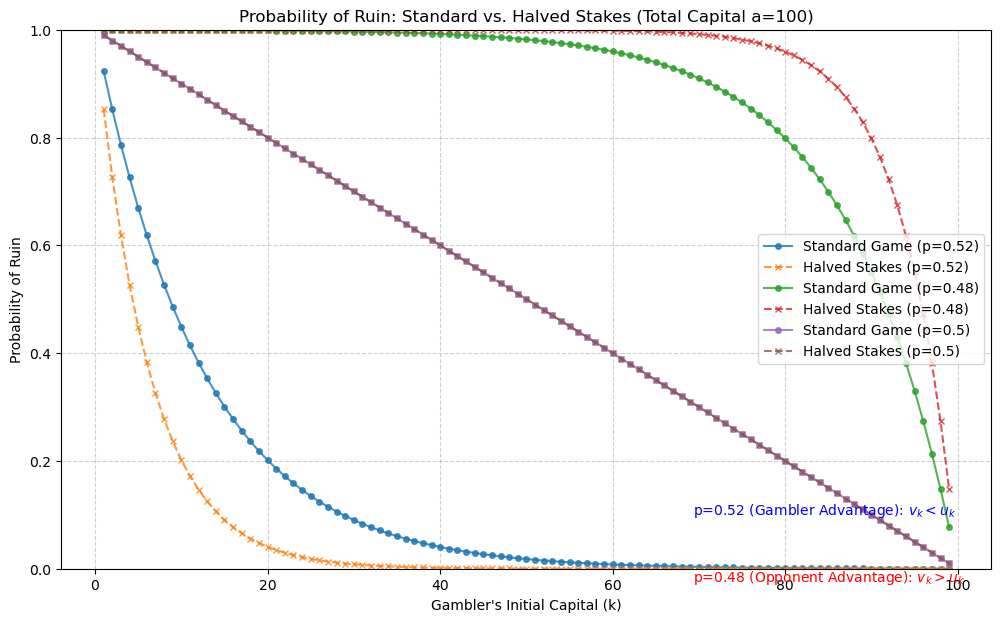

In [8]:
import math
import matplotlib.pyplot as plt

# Re-using the functions from the previous turn for consistency
def calculate_s_ratio(p):
    """Calculates the ratio s = q/p."""
    if not (0 < p < 1):
        raise ValueError("Probability p must be between 0 and 1 (exclusive).")
    q = 1.0 - p
    return q / p

def calculate_ruin_probability_standard(k, a, p):
    """
    Calculates the probability of ruin for the gambler in a standard game.
    (i.e., gambler reaches 0 before reaching 'a')
    """
    if not isinstance(k, int) or k < 0:
        raise ValueError("Initial capital k must be a non-negative integer.")
    if not isinstance(a, int) or a <= k:
        raise ValueError("Total capital 'a' must be an integer greater than 'k'.")
    if not (0 < p < 1):
        raise ValueError("Probability p must be between 0 and 1 (exclusive).")

    if k == 0:
        return 1.0  # Already ruined
    if k == a:
        return 0.0  # Already reached goal (opponent ruined)

    if math.isclose(p, 0.5):
        # Fair game (p = 0.5)
        ruin_prob = 1.0 - (k / a)
    else:
        # Unfair game (p != 0.5)
        s = calculate_s_ratio(p)
        ruin_prob = (math.pow(s, k) - math.pow(s, a)) / (1.0 - math.pow(s, a))
    
    return ruin_prob

def calculate_ruin_probability_halved_stakes(k_original, a_original, p):
    """
    Calculates the probability of ruin when stakes are halved.
    This effectively doubles the gambler's initial capital and the total capital.
    """
    if not isinstance(k_original, int) or k_original < 0:
        raise ValueError("Original initial capital k must be a non-negative integer.")
    if not isinstance(a_original, int) or a_original <= k_original:
        raise ValueError("Original total capital 'a' must be an integer greater than 'k'.")
    if not (0 < p < 1):
        raise ValueError("Probability p must be between 0 and 1 (exclusive).")

    # Effective capital and total capital when stakes are halved
    k_new = 2 * k_original
    a_new = 2 * a_original

    ruin_prob_new = calculate_ruin_probability_standard(k_new, a_new, p)
    
    return ruin_prob_new

# --- Plotting Function ---
def plot_ruin_probabilities_changing_stakes(a_total, p_values):
    """
    Plots the probability of ruin for standard vs. halved-stakes games
    as a function of initial capital k.

    Args:
        a_total (int): The total capital in the game.
        p_values (list): A list of 'p' values (win probabilities) to plot for.
    """
    k_values = list(range(1, a_total)) # k from 1 up to a_total - 1

    plt.figure(figsize=(12, 7))

    for p in p_values:
        ruin_probs_standard = [calculate_ruin_probability_standard(k, a_total, p) for k in k_values]
        ruin_probs_halved = [calculate_ruin_probability_halved_stakes(k, a_total, p) for k in k_values]

        plt.plot(k_values, ruin_probs_standard, label=f'Standard Game (p={p})', linestyle='-', marker='o', markersize=4, alpha=0.8)
        plt.plot(k_values, ruin_probs_halved, label=f'Halved Stakes (p={p})', linestyle='--', marker='x', markersize=4, alpha=0.8)
        
        # Add interpretation to the plot title or legend
        if math.isclose(p, 0.5):
            pass # No specific inequality for fair game in title
        elif calculate_s_ratio(p) < 1: # p > 0.5
            plt.text(k_values[-1]*0.7, ruin_probs_standard[-1] + 0.1, f'p={p} (Gambler Advantage): $v_k < u_k$', color='blue' if p==0.52 else 'orange')
        else: # p < 0.5
            plt.text(k_values[-1]*0.7, ruin_probs_standard[-1] - 0.1, f'p={p} (Opponent Advantage): $v_k > u_k$', color='red' if p==0.48 else 'purple')


    plt.title(f'Probability of Ruin: Standard vs. Halved Stakes (Total Capital a={a_total})')
    plt.xlabel('Gambler\'s Initial Capital (k)')
    plt.ylabel('Probability of Ruin')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.ylim(0, 1) # Probability is between 0 and 1
    plt.show()

# --- Call the plotting function with example parameters ---
plot_ruin_probabilities_changing_stakes(a_total=100, p_values=[0.52, 0.48, 0.5])